In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets,linear_model
clf = linear_model.LinearRegression()
X = [[0,0],[1,1],[2,2]]
y = [0,1,2]
clf.fit(X,y)
print(clf.coef_)
print(clf.intercept_)

[0.5 0.5]
2.220446049250313e-16


In [5]:
data = pd.read_csv('CCPP/ccpp1.csv')
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [6]:
data.shape

(9568, 5)

In [7]:
X = data[['AT','V','AP','RH']]
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [8]:
y = data[['PE']]
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7176, 4)
(7176, 1)
(2392, 4)
(2392, 1)


In [17]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
print(linreg.intercept_)
print(linreg.coef_)

[447.06297099]
[[-1.97376045 -0.23229086  0.0693515  -0.15806957]]


In [20]:
y_pred = linreg.predict(X_test)
from sklearn import  metrics
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MSE: 20.080401202073904
RMSE: 4.481116066570236


In [21]:
X = data[['AT','V','AP']]
y = data[['PE']]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
from sklearn.linear_model import  LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

y_pred = linreg.predict(X_test)
from sklearn import  metrics

print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MSE: 23.208907470136225
RMSE: 4.817562399194869


In [22]:
X = data[['AT','V','AP','RH']]
y = data[['PE']]
from sklearn.model_selection import  cross_val_predict
predicted = cross_val_predict(linreg,X,y,cv=10)
print("MSE:",metrics.mean_squared_error(y,predicted))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y,predicted)))


MSE: 20.7955974619431
RMSE: 4.560219014690314


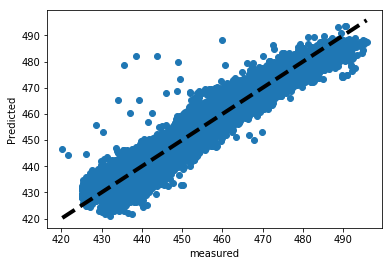

In [25]:
fig,ax = plt.subplots()
ax.scatter(y,predicted)
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('Predicted')
plt.show()